In [1]:
import gensim
lda_model = gensim.models.ldamodel.LdaModel.load('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/model_0.11_0.31_30')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import gensim.corpora as corpora
id2word = corpora.Dictionary.load('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/model_0.11_0.31_30.id2word')

In [36]:
papers=pd.read_csv('N:\\Bibliometric_Germany\\KB data\\processed\\new_2021_April\\04_all_records_Text.csv',encoding=encoding)

In [4]:
from pprint import pprint

pprint(lda_model.print_topics(num_topics=-1))

[(0,
  '0.014*"space" + 0.012*"earth" + 0.011*"wave" + 0.007*"model" + '
  '0.007*"surface" + 0.006*"field" + 0.006*"datum" + 0.006*"rock" + '
  '0.006*"seismic" + 0.006*"structure"'),
 (1,
  '0.047*"material" + 0.016*"property" + 0.015*"surface" + 0.014*"apply" + '
  '0.011*"structure" + 0.010*"film" + 0.009*"growth" + 0.009*"metal" + '
  '0.009*"thin_film" + 0.009*"magnetic"'),
 (2,
  '0.020*"disease" + 0.012*"cardiovascular" + 0.012*"patient" + '
  '0.011*"clinical" + 0.010*"function" + 0.009*"heart" + 0.008*"medicine" + '
  '0.008*"cardiac" + 0.007*"lung" + 0.007*"american"'),
 (3,
  '0.029*"infection" + 0.018*"disease" + 0.016*"clinical" + 0.013*"immunology" '
  '+ 0.011*"virus" + 0.010*"patient" + 0.008*"vaccine" + 0.008*"microbiology" '
  '+ 0.008*"transplantation" + 0.007*"blood"'),
 (4,
  '0.013*"ecology" + 0.011*"population" + 0.011*"evolution" + 0.010*"forest" + '
  '0.009*"diversity" + 0.008*"specie" + 0.008*"genetic" + 0.008*"biology" + '
  '0.008*"animal" + 0.007*"conserv

In [3]:
import gensim.corpora as corpora
temp_file = "N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/Corpus"
corpus = corpora.MmCorpus(temp_file)

In [76]:
# 10.1 show topics for each sentence

x=corpus[0:30]
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=papers):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_3 in enumerate(ldamodel[corpus]): 
        row=row_3[0] if ldamodel.per_word_topics else row_3
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    #contents = texts
    sent_topics_df = pd.concat([texts,sent_topics_df], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=papers)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.drop(columns={'Unnamed: 0','index'},inplace=True)
# Show
df_dominant_topic.head(10)

AUTHOR_ID_NEW                                               Text  \
0   6.503845e+09  About the differentiation of the podotrochlear...   
1   6.503845e+09  Timber structure of a storage hall for cut tim...   
2   6.503845e+09  Fusion rules for the continuum sectors of the ...   
3   6.503846e+09  Cutaneous infiltrates of myelogenous leukemia ...   
4   6.503846e+09  New equation for the evaluation of standard ad...   
5   6.503846e+09  The prosecution of public figures and the sepa...   
6   6.503846e+09  Influence of phytogenic surfactants (quillaya ...   
7   6.503846e+09  Epitaxial growth of AlN and GaN on Si(1 1 1) b...   
8   6.503846e+09  Recommendations for primary alimentary prevent...   
9   6.503846e+09                                       Bautechnik     

   Dominant_Topic  Perc_Contribution  \
0            26.0             0.3954   
1             6.0             0.4567   
2            22.0             0.3821   
3            21.0             0.5459   
4            21.0             0.3955   
5            12.0             0.7671   
6            27.0             0.5629   
7             1.0             0.6153   
8            21.0             0.6982   
9             0.0             0.0333   

                                      Topic_Keywords  
0  surgery, bone, injury, treatment, fracture, ti...  
1  model, simulation, engineering, flow, dynamic,...  
2  physics, physical_review, letter, physical, en...  
3  drug, clinical, skin, exposure, risk, allergy,...  
4  drug, clinical, skin, exposure, risk, allergy,...  
5  management, health, economic, education, socia...  
6  soil, food, plant, apply, microbial, nutrition...  
7  material, property, surface, apply, structure,...  
8  drug, clinical, skin, exposure, risk, allergy,...  
9  space, earth, wave, model, surface, field, dat...

In [78]:
encoding = 'utf-8'
df_dominant_topic.to_csv('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/Topic_results_30.csv',encoding=encoding)

In [81]:
import pandas as pd
#result=pd.read_csv('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/Topic_results.csv')
#result

In [35]:
result.Dominant_Topic.unique()

array([ 8.,  1., 17.,  0., 18., 13.,  6.,  7., 16.,  9.,  4.,  2., 14.,
       15.,  3., 11., 12., 10.,  5., 19.])

In [7]:
encoding = 'utf-8'
main_code=pd.read_csv("N:\\Bibliometric_Germany\\KB data\\processed\\new_2021_April\\05_AuthorID_Main_Code_old_method.csv",encoding=encoding)

In [89]:
author_main_code=main_code[["AUTHOR_ID_NEW","CODE_all","MAIN_CODE"]]
author_main_code["AUTHOR_CODE_all"]=author_main_code["CODE_all"]
author_main_code=author_main_code.groupby('AUTHOR_ID_NEW').agg({'AUTHOR_CODE_all': lambda x: ';'.join(x)})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
pd.set_option('max_colwidth',500)
pd.set_option('float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', None)
author_main_code=author_main_code.reset_index()

In [93]:
author_main_code=author_main_code.drop_duplicates()
main_code_1=main_code[["AUTHOR_ID_NEW","MAIN_CODE"]]
author_main_code=author_main_code.merge(main_code_1,on="AUTHOR_ID_NEW",how="left")

In [94]:
author_main_code.head(10)

AUTHOR_ID_NEW  \
0 6503845403.0000   
1 6503845461.0000   
2 6503845461.0000   
3 6503845493.0000   
4 6503845493.0000   
5 6503845540.0000   
6 6503845540.0000   
7 6503845540.0000   
8 6503845628.0000   
9 6503845628.0000   

                                                                             AUTHOR_CODE_all  \
0                                                                                       3402   
1                                                                        2205;2215;2205;2215   
2                                                                        2205;2215;2205;2215   
3                                                                        3109;2610;3109;2610   
4                                                                        3109;2610;3109;2610   
5                                               2734;2722;2708;2734;2722;2708;2734;2722;2708   
6                                               2734;2722;2708;2734;2722;2708;2734;2722;2708   
7                                               2734;2722;2708;2734;2722;2708;2734;2722;2708   
8  1602;1600;1500;3105;2213;1600;1500;3105;2213;1600;1500;3105;2213;1600;1500;3105;2213;1303   
9  1602;1600;1500;3105;2213;1600;1500;3105;2213;1600;1500;3105;2213;1600;1500;3105;2213;1303   

     MAIN_CODE  
0   veterinary  
1  Engineering  
2  Engineering  
3  Mathematics  
4  Mathematics  
5     Medicine  
6     Medicine  
7     Medicine  
8    Chemistry  
9    Chemistry

In [99]:
author_main_code.drop_duplicates("AUTHOR_ID_NEW",inplace=True)

In [106]:
result_with_maincode=df_dominant_topic.merge(author_main_code,on="AUTHOR_ID_NEW",how="left")

In [111]:
result_with_maincode

AUTHOR_ID_NEW  \
0        6503845403.0000   
1        6503845461.0000   
2        6503845493.0000   
3        6503845540.0000   
4        6503845628.0000   
...                  ...   
1435472 57216450803.0000   
1435473 57216450995.0000   
1435474 57216451296.0000   
1435475 57216451394.0000   
1435476 57216451417.0000   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Text  \
0                                                                                                                                                                                                                          About the differentiation of the podotrochlear syndrome with the aid of diagnostic anaesthesia and the manometry in the distal interphalangeal joint and the navicular bursa Pferdeheilkunde Diagnostic anaesthesia Distal interphalangeal joint Manometry Navicular bursa Podotrochlear syndrome   
1                                                                                                                                                                                                                                                                                                                                                                                                        Timber structure of a storage hall for cut timbers. Rules and non-rules - The story of a retrogression Bautechnik     
2                                                                                                                                                                                                                                                                                                                                                                          Fusion rules for the continuum sectors of the Virasoro algebra with c = 1 Letters in Mathematical Physics Superselection sectors Virasoro algebra   
3                                                                                                                                                                                                                                                                                                                                                                       Cutaneous infiltrates of myelogenous leukemia in association with pre-existing skin diseases (multiple letters) [2] Journal of Cutaneous Pathology     
4        New equation for the evaluation of standard addition experiments applied to ion chromatography Microchimica Acta Anionic impurities Ion chromatography Sodium chloride Standard addition Traceability Ion chromatographic precision measurement procedure for electrolytes in human serum: Validation with the aid of primary measurement procedures Accreditation and Quality Assurance Clinical chemistry Electrolytes Ion chromatography Traceability Uncertainty budget Highly accurate gas chromatographic ...   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ...   
1435472                                                                                   

In [101]:
result_with_maincode.drop(columns="Text",inplace=True)

In [ ]:
#Visualization 1: Word Cloud

In [5]:
# 1. Wordcloud of Top N words in each topic
#import pyplot as plt  
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
#from matplotlib import colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)





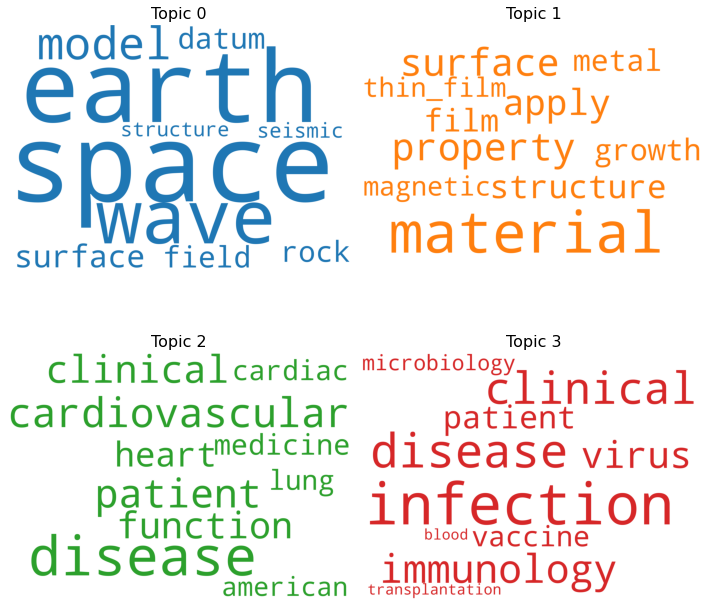

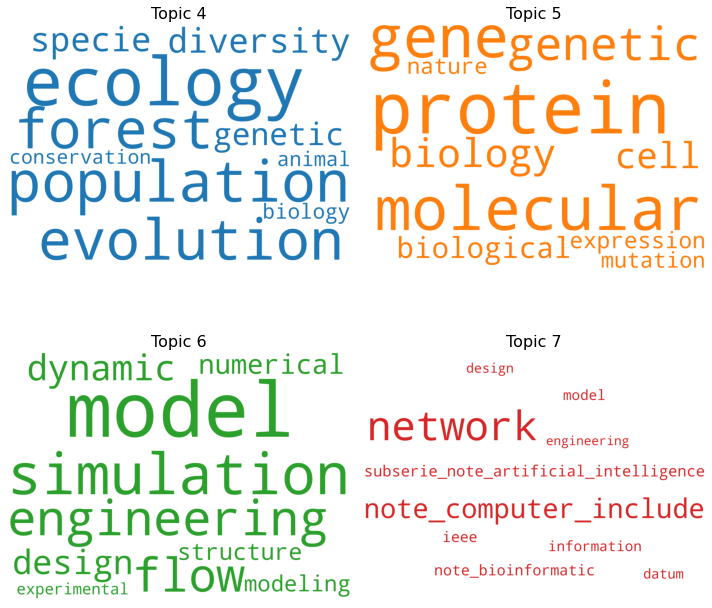

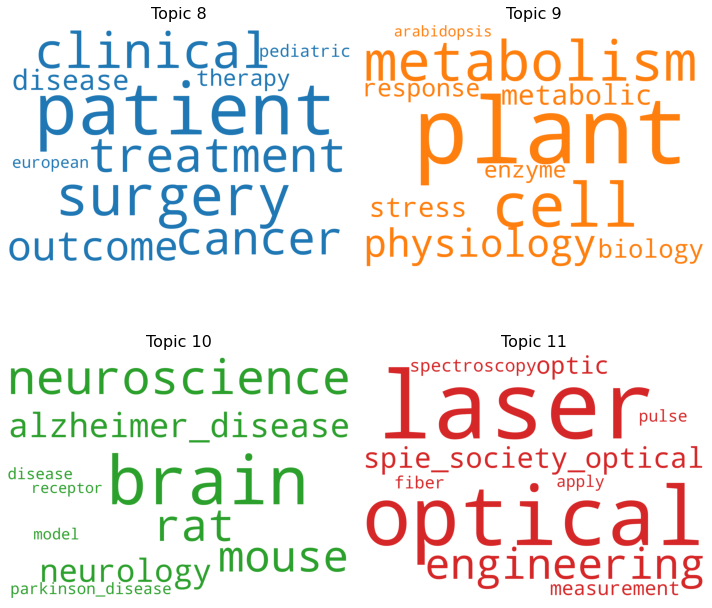

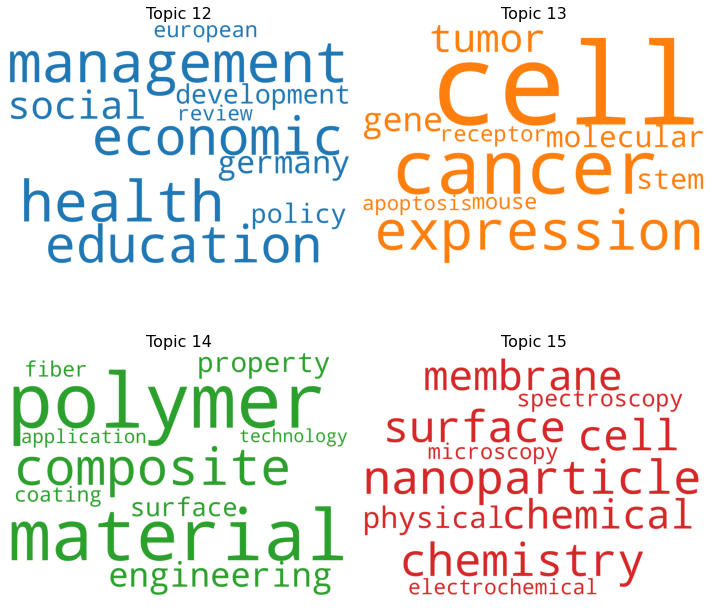

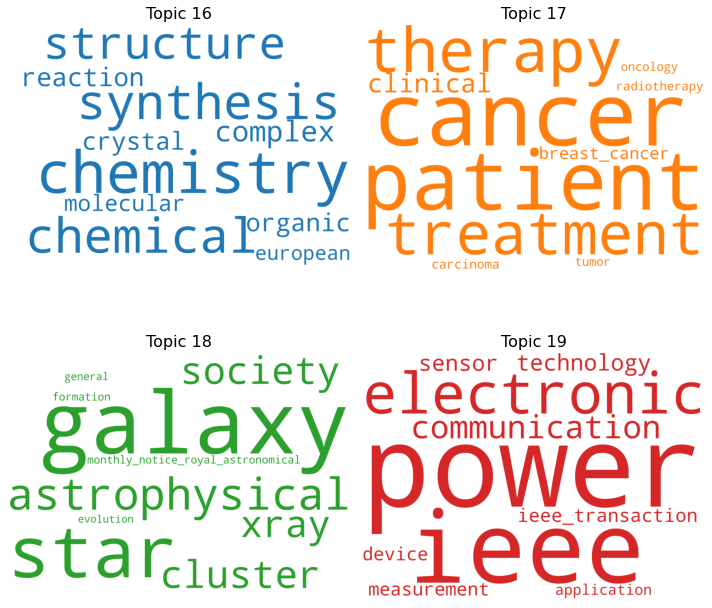

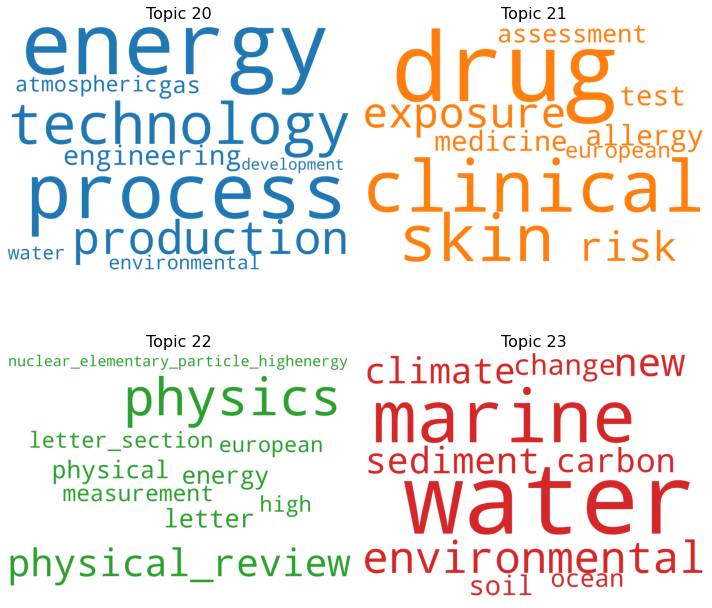

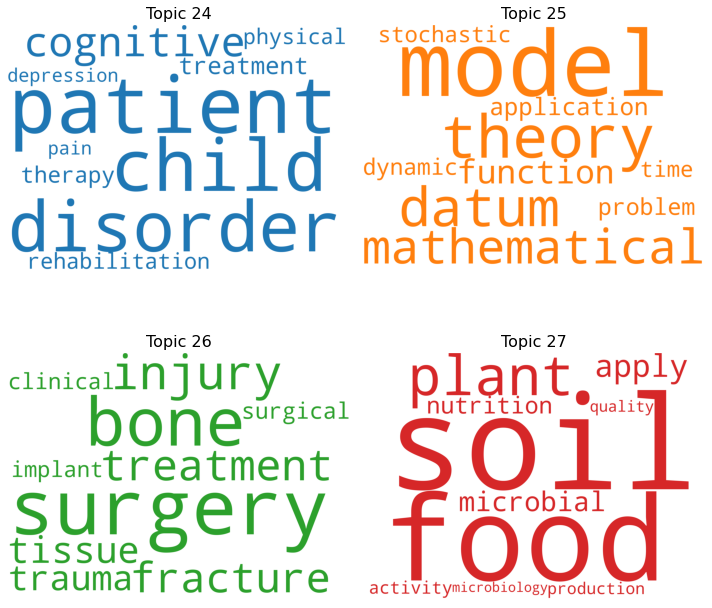

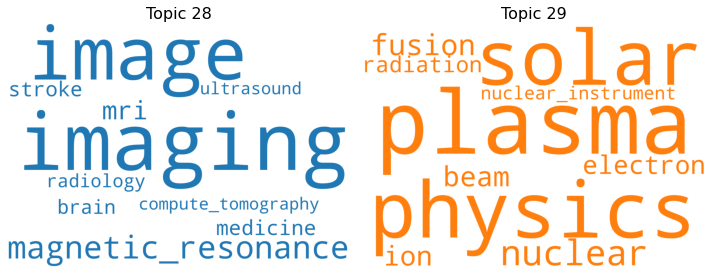

In [6]:
for n in range(8):
    
    if n<7:
        topics=lda_model.show_topics(num_topics=30,formatted=False)[(0+n*4):(4+n*4)]
        
        fig, axes = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)
      
        for i, ax in enumerate(axes.flatten()):
            fig.add_subplot(ax)
            topic_words = dict(topics[i][1])
            cloud.generate_from_frequencies(topic_words)
            plt.gca().imshow(cloud)
            plt.gca().set_title('Topic ' + str(i+n*4), fontdict=dict(size=16))
            plt.gca().axis('off')
    
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.axis('off')
        plt.margins(x=0, y=0)
        plt.tight_layout()
        plt.show()  
    else:
        topics=lda_model.show_topics(num_topics=30,formatted=False)[28:30]
        fig, axes = plt.subplots(1,2, figsize=(10,10), sharex=True, sharey=True)
      
        for i, ax in enumerate(axes.flatten()):
            fig.add_subplot(ax)
            topic_words = dict(topics[i][1])
            cloud.generate_from_frequencies(topic_words)
            plt.gca().imshow(cloud)
            plt.gca().set_title('Topic ' + str(i+n*4), fontdict=dict(size=16))
            plt.gca().axis('off')
    
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.axis('off')
        plt.margins(x=0, y=0)
        plt.tight_layout()
        plt.show()
            

In [114]:
print(result_with_maincode[result_with_maincode["Perc_Contribution"]<0.3].AUTHOR_ID_NEW.nunique())
print(result_with_maincode[result_with_maincode["Perc_Contribution"]>=0.3].AUTHOR_ID_NEW.nunique())

81044
1354433


In [116]:
print(result_with_maincode[result_with_maincode["Dominant_Topic"]==24].AUTHOR_ID_NEW.nunique())
print(result_with_maincode[result_with_maincode["Dominant_Topic"]==15].AUTHOR_ID_NEW.nunique())
print(result_with_maincode[result_with_maincode["Dominant_Topic"]==16].AUTHOR_ID_NEW.nunique())
print(result_with_maincode[result_with_maincode["Dominant_Topic"]==20].AUTHOR_ID_NEW.nunique())
print(result_with_maincode[(result_with_maincode["Dominant_Topic"]==6)| (result_with_maincode["Dominant_Topic"]==19)].AUTHOR_ID_NEW.nunique())

63017
29307
57110
73454
104621


In [118]:
print(result_with_maincode[result_with_maincode["Dominant_Topic"]==3].AUTHOR_ID_NEW.nunique())
print(result_with_maincode[result_with_maincode["Dominant_Topic"]==25].AUTHOR_ID_NEW.nunique())
print(result_with_maincode[result_with_maincode["Dominant_Topic"]==28].AUTHOR_ID_NEW.nunique())
print(result_with_maincode[result_with_maincode["Dominant_Topic"]==12].AUTHOR_ID_NEW.nunique())

40232
33308
28211
125388


In [ ]:
x_0=result_with_maincode[result_with_maincode["Dominant_Topic"]==0].sort_values(by='Perc_Contribution', ascending=False).head(20)
for i in range(30):
    x=result_with_maincode[result_with_maincode["Dominant_Topic"]==i].sort_values(by='Perc_Contribution', ascending=False).head(20)
    x_0=pd.concat([x_0,x])

x_0.to_csv('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/classification/topics_main_records_30.csv', encoding=encoding)

In [112]:
# add some text to the records

x_0=result_with_maincode[result_with_maincode["Dominant_Topic"]==2].sort_values(by='Perc_Contribution', ascending=False).head(20)
sus=[3,15,21,28]
for i in sus:
    print(i)
    x=result_with_maincode[result_with_maincode["Dominant_Topic"]==i].sort_values(by='Perc_Contribution', ascending=False).head(20)
    x_0=pd.concat([x_0,x])
    
x_0.to_csv('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/classification/suspicious_records_text.csv', encoding=encoding)

3
15
21
28


In [128]:
author_Topic=result_with_maincode.drop(columns={"Text","Topic_Keywords","AUTHOR_CODE_all"})
author_Topic.rename(columns={"MAIN_CODE":"MAIN_CODE"},inplace=True)
author_Topic["Dominant_Topic_new"]=author_Topic.apply(lambda row:30 if row["Perc_Contribution"]<0.3 else row["Dominant_Topic"], axis=1)

In [133]:
dic_1= {
30: "Multidisciplinary",
4:"Agricultural, Biological Sciences and Environmental Science",
9:"Agricultural, Biological Sciences and Environmental Science",
27:"Agricultural, Biological Sciences and Environmental Science",
5:"Biochemistry, Genetics and Molecular Biology",
13:"Biochemistry, Genetics and Molecular Biology",
15:"Chemistry and Chemical Engineering",
16:"Chemistry and Chemical Engineering",
7:"Computer Science",
0:"Earth and Planetary Sciences",
18:"Earth and Planetary Sciences",
23:"Earth and Planetary Sciences",
12:"Economics and Social Science",
6:"Engineering",
19:"Engineering",
20:"Energy",
28:"Health Professions",
3:"Immunology and Microbiology",
1:"Materials Science",
14:"Materials Science",
25:"Mathematics",
2:"Medicine",
8:"Medicine",
17:"Medicine",
26:"Medicine",
10:"Neuroscience",
21:"Pharmacology, Toxicology and Pharmaceutics",
11:"Physics and Astronomy",
22:"Physics and Astronomy",
29:"Physics and Astronomy",
24:"Psychology"
     }
author_Topic["Topic"]=author_Topic["Dominant_Topic_new"]
author_Topic=author_Topic.replace({"Topic": dic_1})
author_Topic.drop(columns={"Dominant_Topic"},inplace=True)

In [134]:
author_Topic.to_csv('N:/Bibliometric_Germany/KB data/processed/new_2021_April/11_author_discipline_LDA.csv', encoding=encoding)

In [8]:
# 10.2 Display setting to show more characters in column
import pandas as pd
pd.options.display.max_colwidth = 1000

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = result_with_maincode.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([result_with_maincode, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(3)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
#sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(90)

NameError: name 'result_with_maincode' is not defined

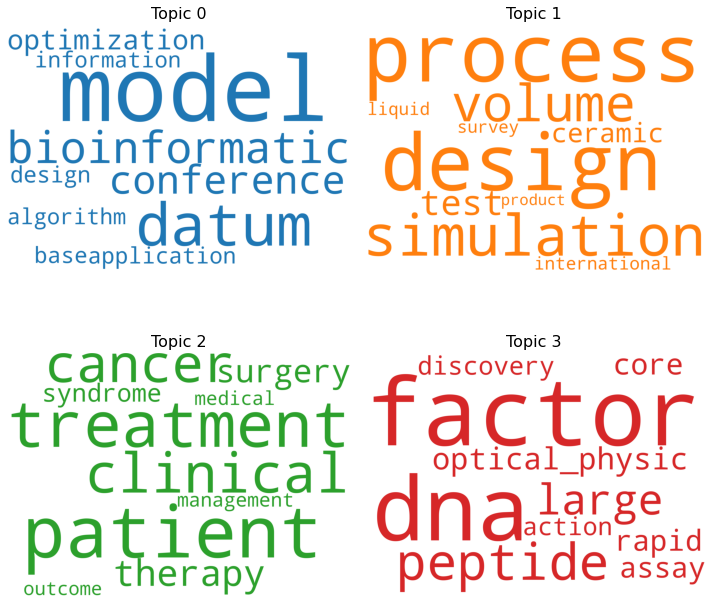

In [40]:





topics = lda_model.show_topics(num_topics=26,formatted=False)[0:4]
fig, axes = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [41]:
range(6)

range(0, 6)

In [ ]:
for i, row_list in enumerate(lda_model[corpus]):
     for n, w in row_list:
            print (n)

In [9]:
## Get topic weights and dominant topics ------------
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = np.zeros((100000, 26))
for i, row_list in enumerate(lda_model[corpus]):
    for n, w in row_list:
        topic_weights[i][n]=w
    #topic_weights.append([w for i, w in row_list])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh


        
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

ValueError: too many values to unpack (expected 2)

In [105]:
from matplotlib import cm
import random 
import matplotlib.colors as mcolors

output_notebook()
n_topics =26
mycolors = np.array(random.choices(list(mcolors.CSS4_COLORS.values()),k = 26) )
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

Loading BokehJS ...

In [63]:
import random 
import matplotlib.colors as mcolors
colors = np.array(random.choices(list(mcolors.CSS4_COLORS.values()),k = 4) )
colors

array(['#FF69B4', '#2F4F4F', '#00FFFF', '#FFF0F5'], dtype='<U7')